In [1]:
import itertools
from pprint import pprint
from operator import getitem

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import spacepy.plot as spp
import pymc as mc
import tqdm

This unreleased version of SpacePy is not supported by the SpacePy team.


/Users/balarsen/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


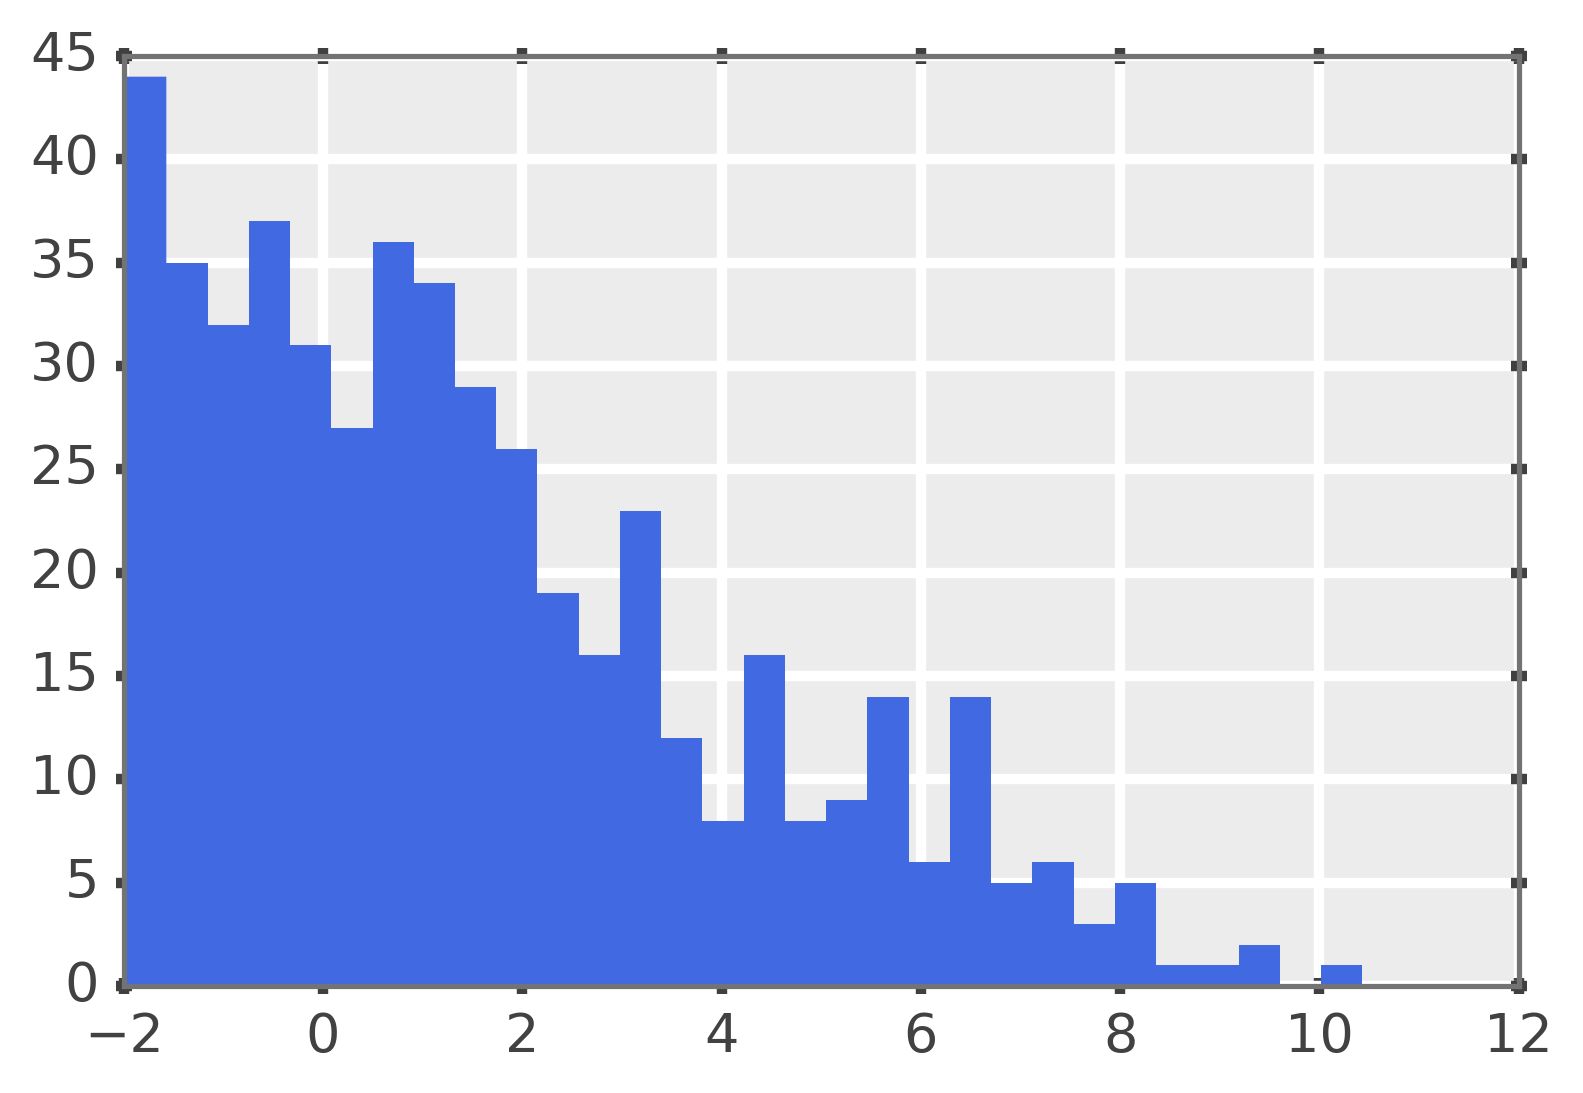

In [11]:
data = mc.TruncatedNormal('data', -1, (4)**-2, -2, 10000, size=500).value
_ = spp.plt.hist(data, 30)

In [14]:
center = mc.Uniform('center', -2, 100)
dat = mc.TruncatedNormal('dat', center, 4**-2, -2, 10000, observed=True, value=data)
model = mc.MCMC((center, dat))

 [-----------------100%-----------------] 14900 of 14900 complete in 1.8 secPlotting center

center:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	-1.11            0.274            0.004            [-1.666 -0.602]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-1.641           -1.293          -1.108         -0.93         -0.561
	
None


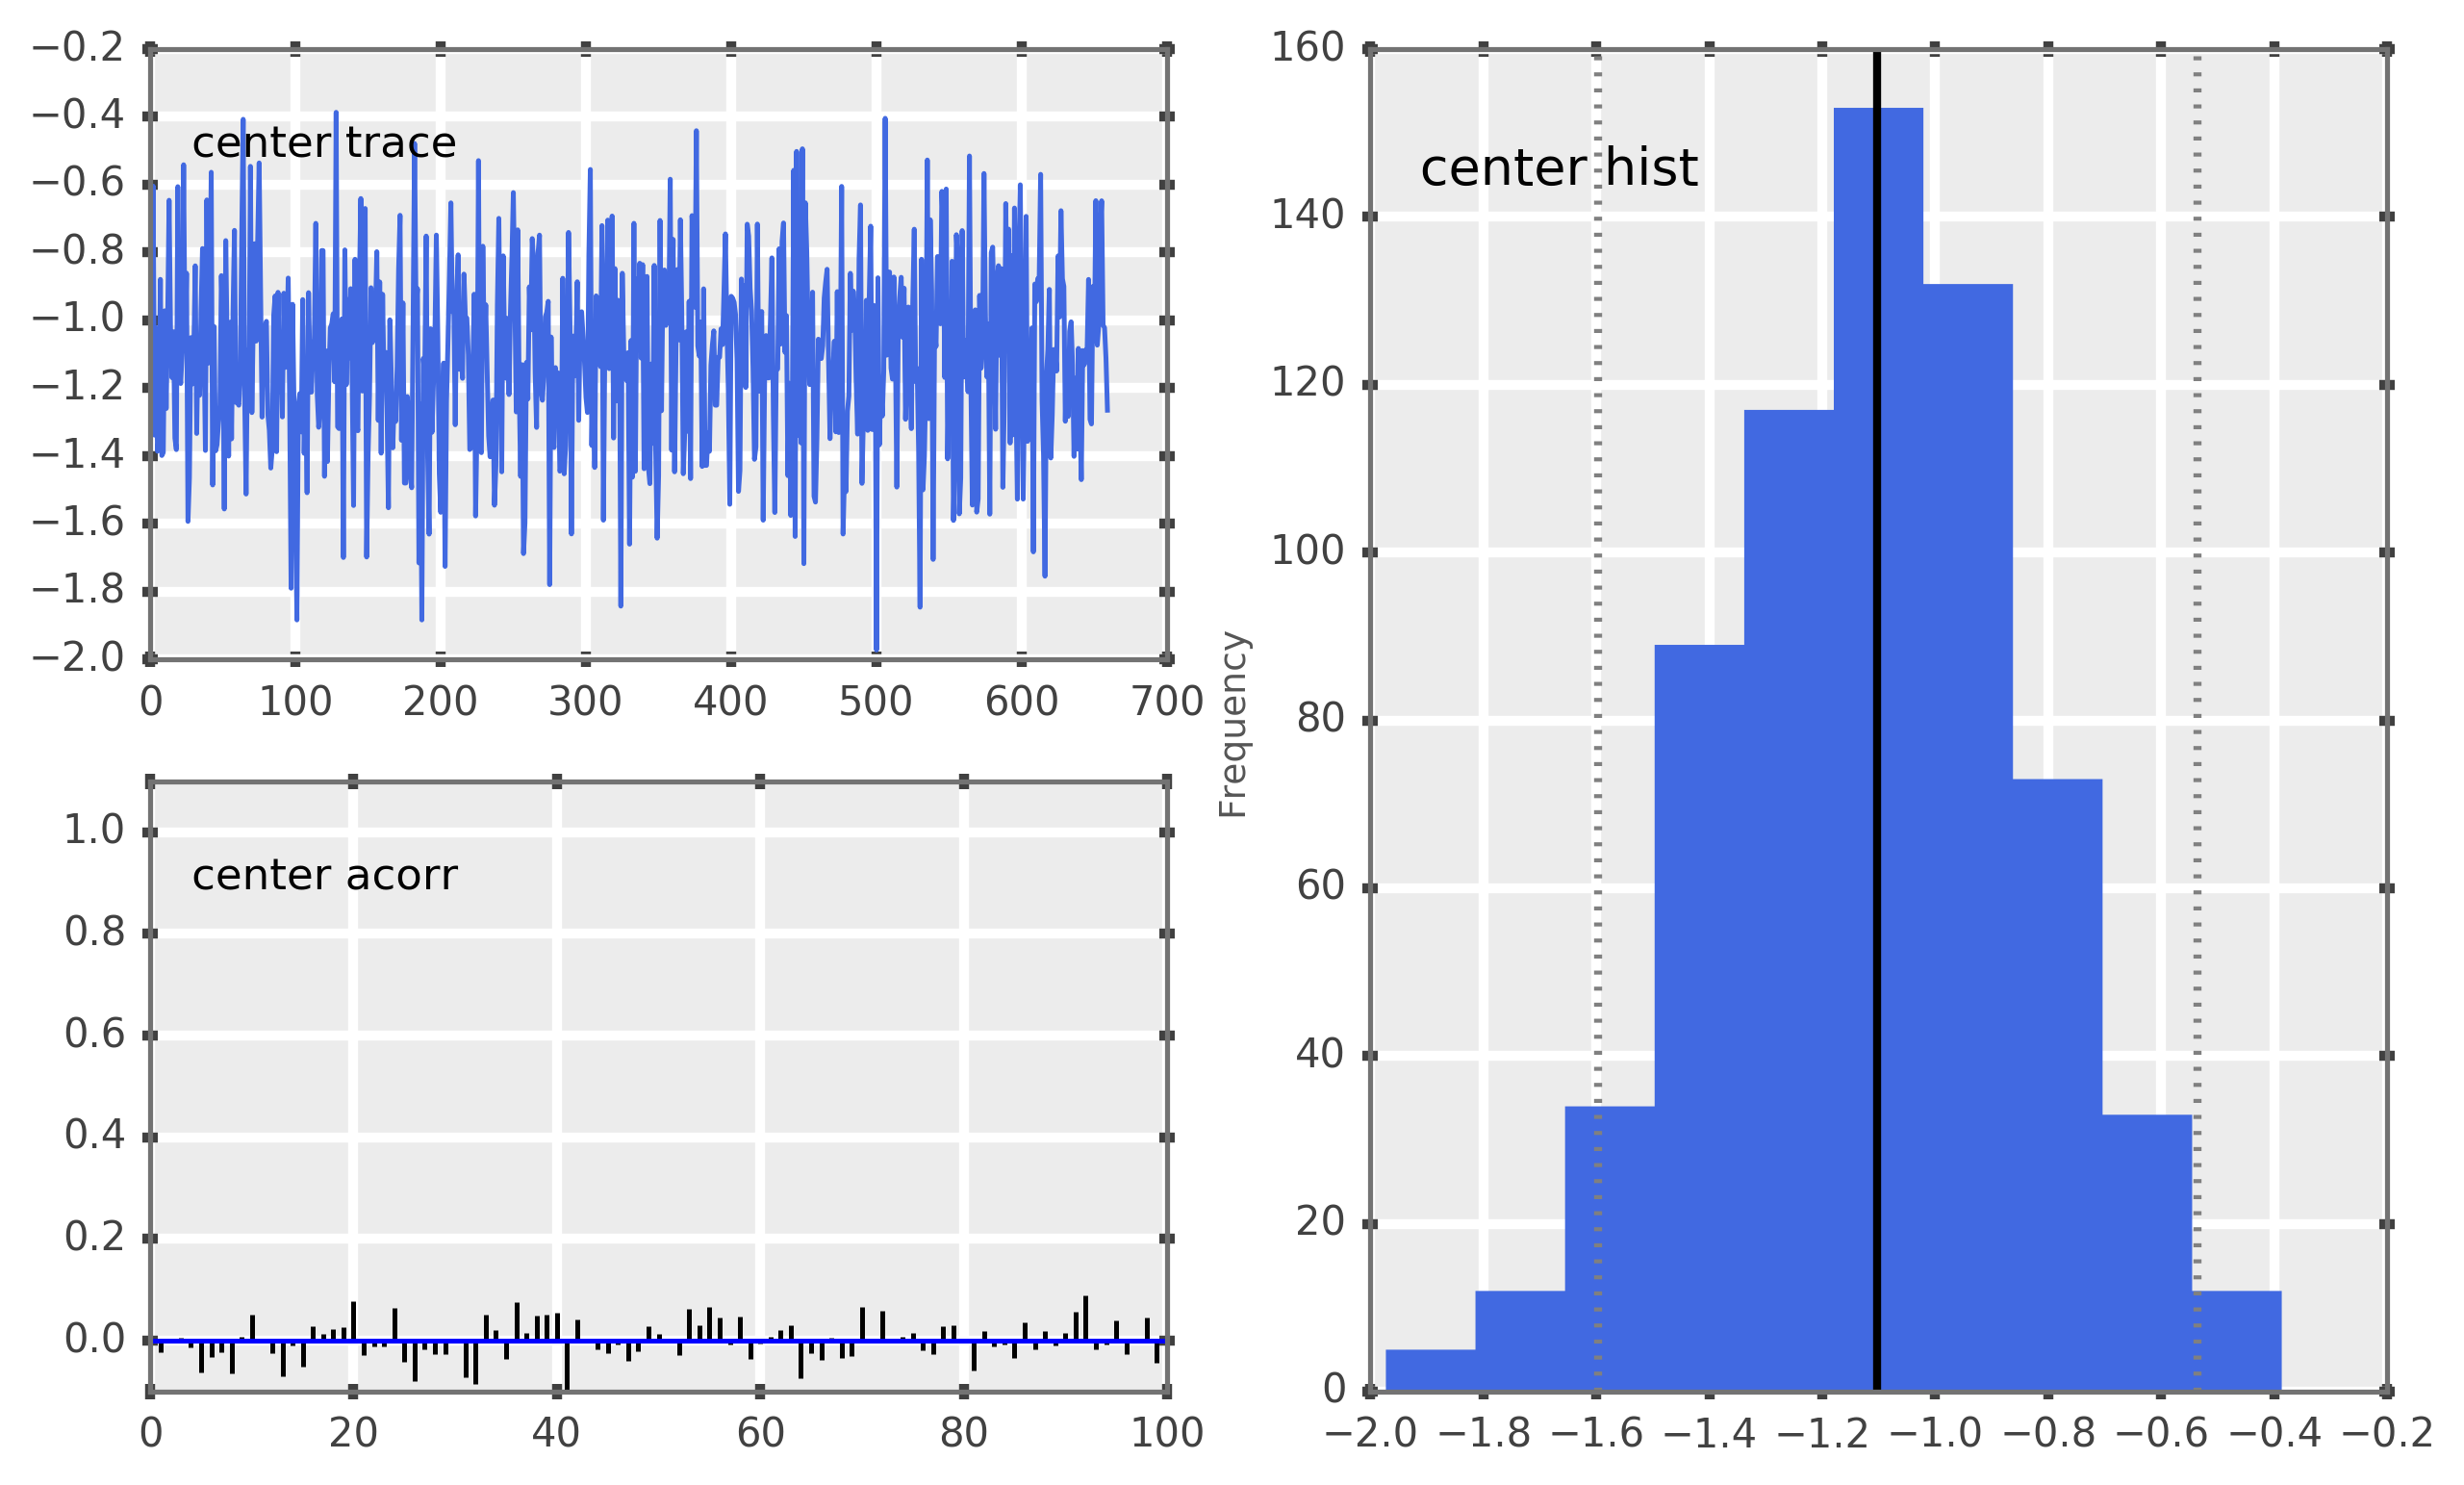

In [17]:
model.sample(10000, burn=100, burn_till_tuned=True, thin=15)
mc.Matplot.plot(model)
print(model.summary())